In [2]:
#DISEASE PREDICTION
#prediction of disease by symptoms using classification(Naive Bayes,Random Forest)

In [57]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#dataset taken from kaggle
#training dataset----- in the form of 0 and 1
DiseasePrediction=pd.read_csv("Training.csv")  

In [ ]:
#----------------------------------------DATA ANALYSIS,VISUALIZATION & PREDICTION----------------------------------------------

In [4]:
#shape attribute is to determine number of rows and coloumns in the given dataset
#dataset having 4920 rows and 133 coloums
DiseasePrediction.shape 

(4920, 133)

In [58]:
DiseasePrediction.head(10)
#prognosis is target and others are features
#prognosis coloumn consist of diffrent typs of diseases
#and other coloumns are having symptoms of various diseases with 0 and 1 value count 
#0 means no and 1 means yes for particular symptom of disease


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
#Showing missing values & number of coloumns 
#{no missing values in our dataset}
DiseasePrediction.isnull().sum() 

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [7]:
#target value disease counts
#In prognosis coloumn we are having various diseases data i.e common cold 120 rows
DiseasePrediction['prognosis'].value_counts()   

Common Cold                                120
Psoriasis                                  120
Dimorphic hemmorhoids(piles)               120
Pneumonia                                  120
Urinary tract infection                    120
Heart attack                               120
Malaria                                    120
Chronic cholestasis                        120
Hepatitis E                                120
Impetigo                                   120
Dengue                                     120
Alcoholic hepatitis                        120
Fungal infection                           120
Bronchial Asthma                           120
Chicken pox                                120
Hepatitis D                                120
Paralysis (brain hemorrhage)               120
Hypoglycemia                               120
Drug Reaction                              120
hepatitis A                                120
Arthritis                                  120
Osteoarthrist

In [8]:
#41 different type of target diseases are available in the dataset
#unique to detemine total number of diseases in our dataset that can be predicted
len(DiseasePrediction['prognosis'].unique())

41

In [9]:
#particular coloumn of our dataset 'nodal_skin_eruptions' containg 0 and 1 count
DiseasePrediction['nodal_skin_eruptions'].value_counts()

0    4812
1     108
Name: nodal_skin_eruptions, dtype: int64

Text(0.5, 1.0, 'Histogram')

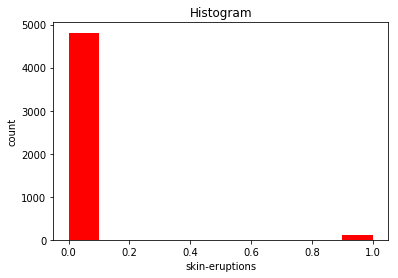

In [10]:
#visualizing 'nodal_skin_eruptions' count of 0 and 1 on Histogram
plt.hist(DiseasePrediction['nodal_skin_eruptions'],color='red')
plt.xlabel("skin-eruptions")
plt.ylabel("count")
plt.title("Histogram")

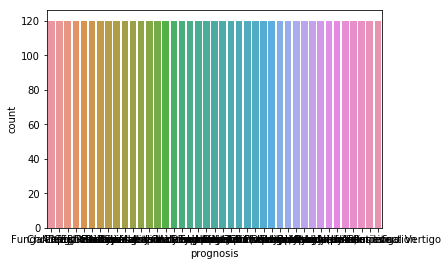

In [11]:
#Visualizing target coloumn(prognosis) using countplot 
#120 values of each diseases 
sns.countplot(DiseasePrediction['prognosis'])

In [12]:
#describing our dataset 
#the diffrence between mean and std is not large therefore our coloumns are equally normalised (due to 0 and 1)
DiseasePrediction.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


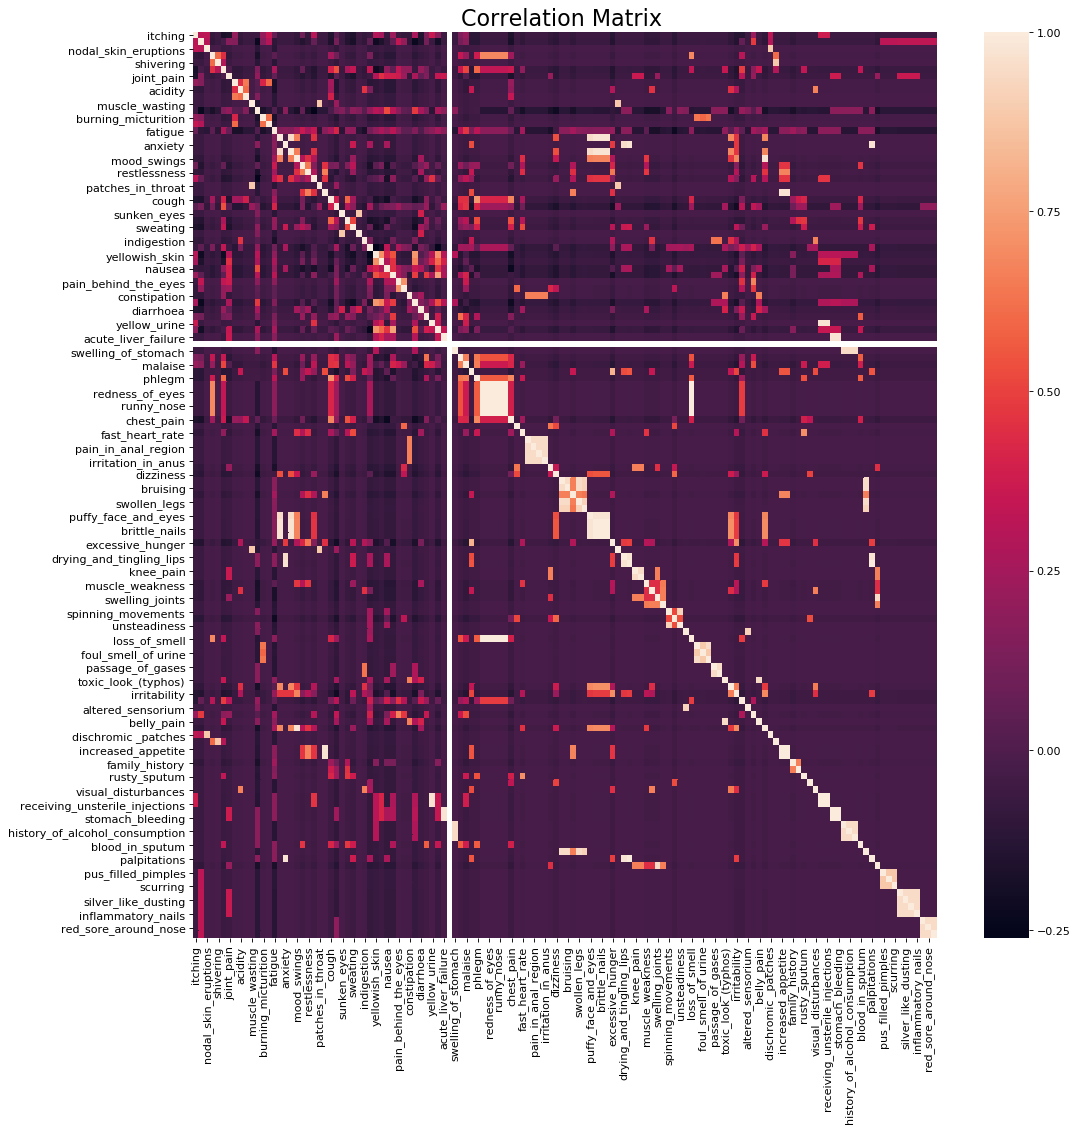

In [13]:
#Heat Map 
#to show the correlation of dataset
#as our dataset is large but only few values are correlated with each other
plt.figure(num=None, figsize=(15,15), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(DiseasePrediction.corr()) 
plt.title('Correlation Matrix ', fontsize=20)
plt.show()

In [14]:
#ScatterMatrix
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = DiseasePrediction[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

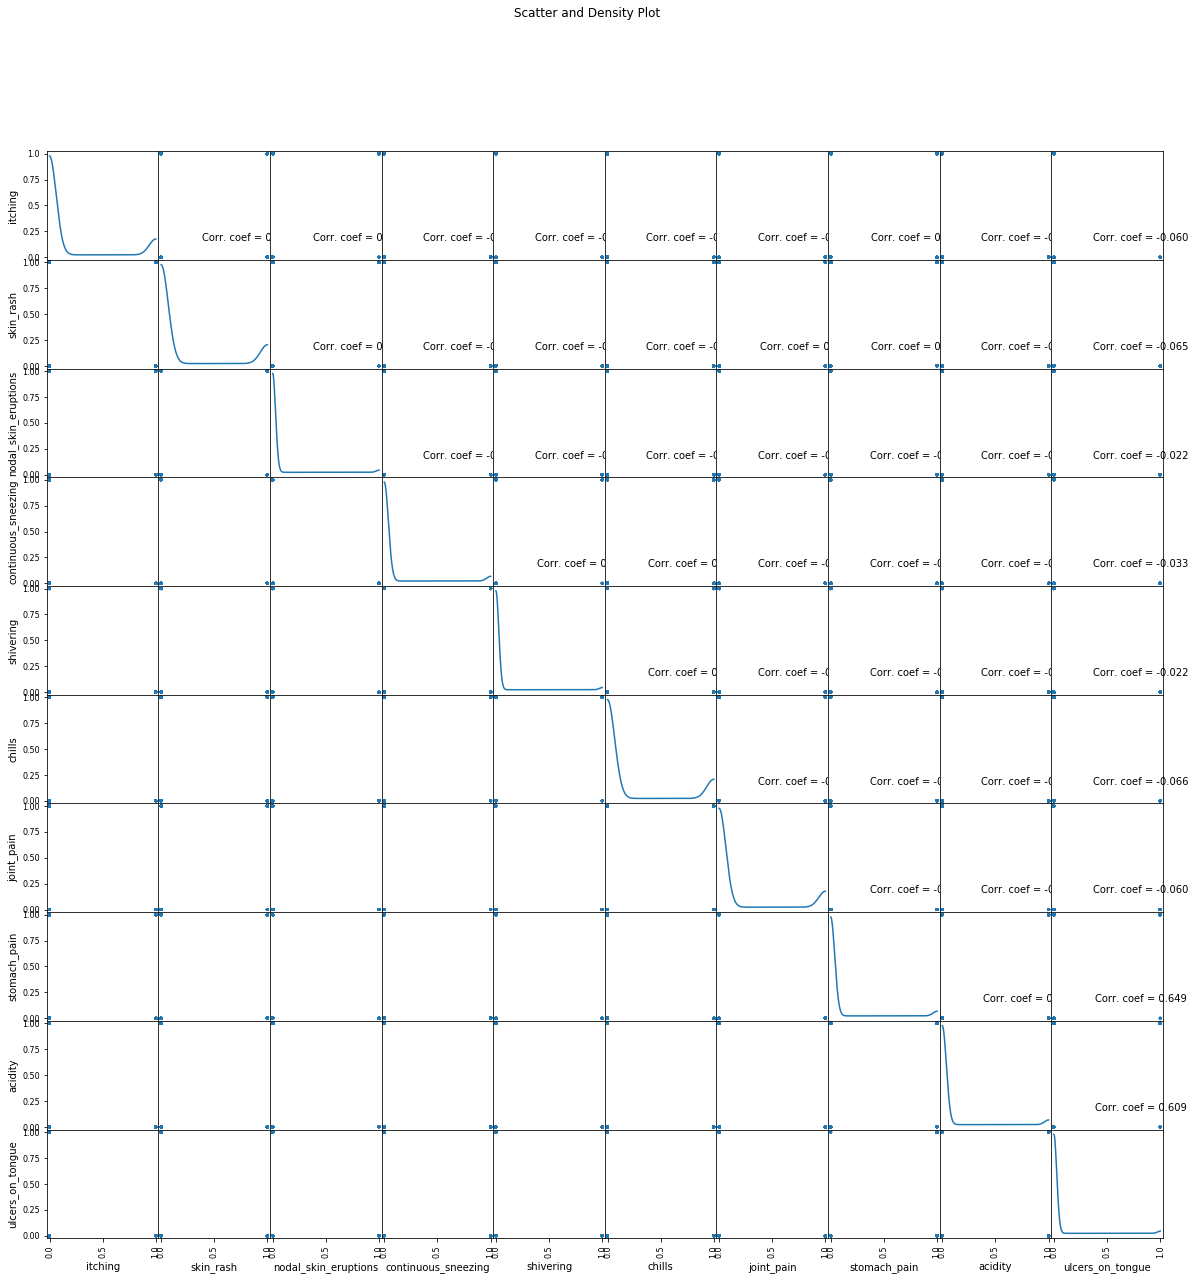

In [15]:
#to show how the values are scattered 
plotScatterMatrix(DiseasePrediction, 20, 10)

In [16]:
#per coloumn plot visualization 
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    

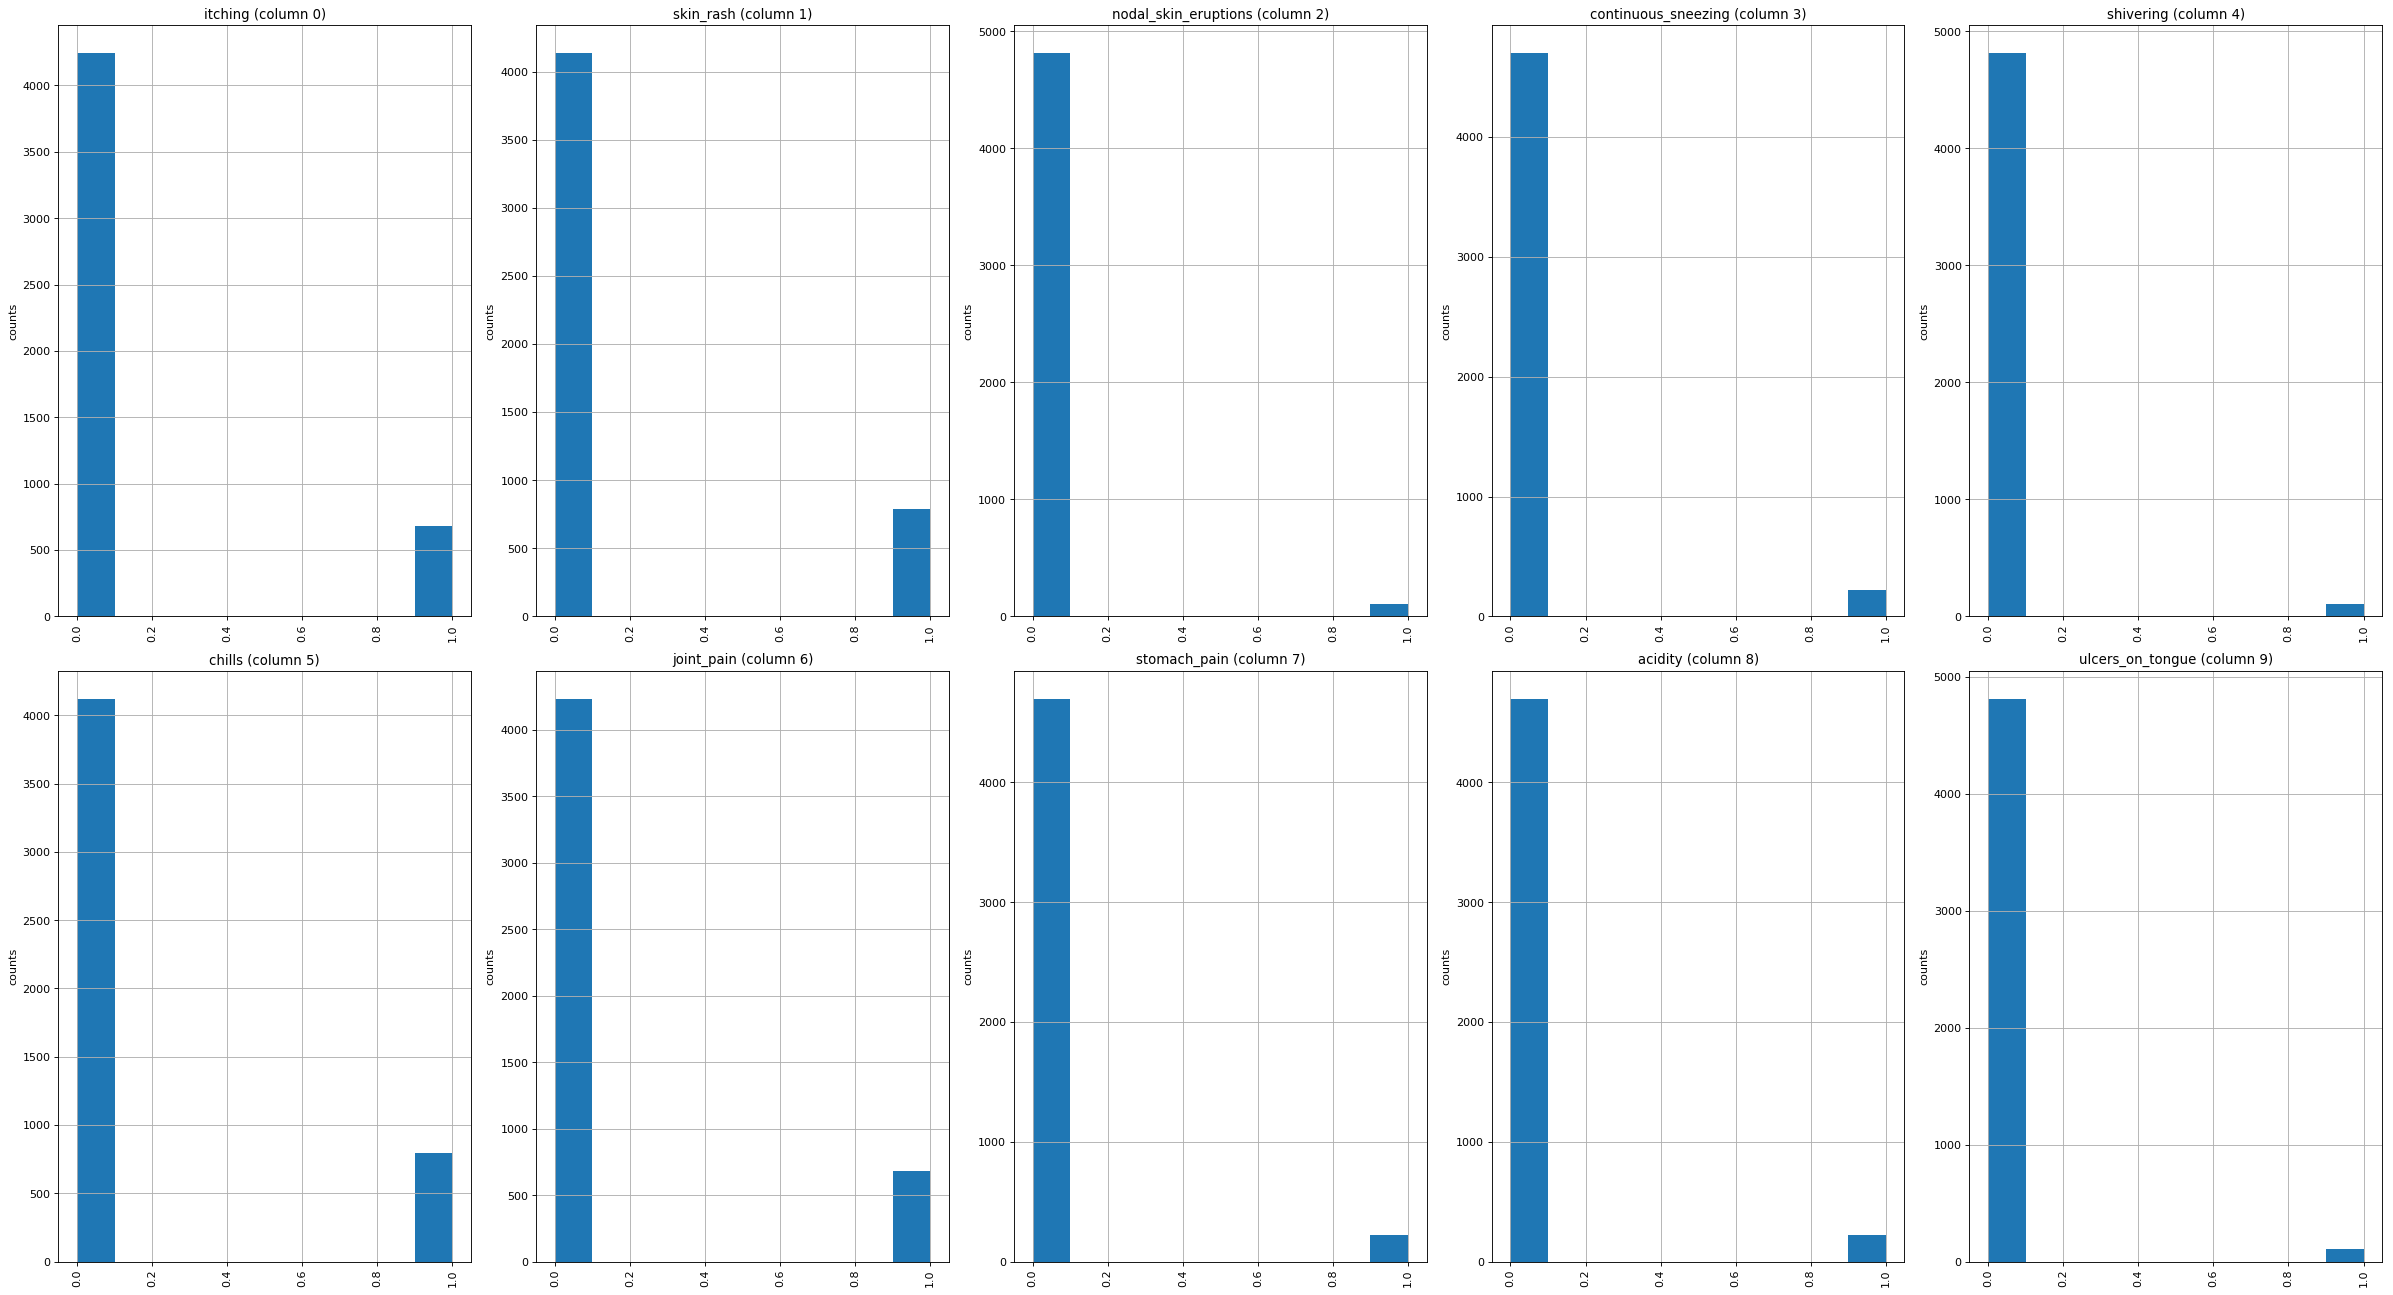

In [17]:
#plotting coloumns to show distribution of 0 and 1 in coloumns
plotPerColumnDistribution(DiseasePrediction, 10, 5)

In [ ]:
#Prediction Model

In [18]:
#Splitting of test and train data 
from sklearn.model_selection import train_test_split

X, y = DiseasePrediction.iloc[:,:-1], DiseasePrediction.iloc[:,-1]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
#Import Random Forest Model------------------random forest ------------
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
#Accuracy of our disease prediction is 100% as  data is used in binary form

Accuracy: 100.0


In [21]:
#clf.feature_importances_
#evaluate the importance of features on an artificial classification task.

In [22]:
feature_imp1 = pd.Series(clf.feature_importances_,index=list(DiseasePrediction.columns[:-1])).sort_values(ascending=False).head(50)
feature_imp1[::-1]
#draw the plot evaluate the importance of features on an artificial classification task.
#extraction of important features in descending order from our dataset
#muscle pain is highest frequently found in disease dataset

mucoid_sputum                0.008216
pus_filled_pimples           0.008237
stomach_pain                 0.008343
blackheads                   0.008371
stiff_neck                   0.008393
weakness_of_one_body_side    0.008466
dischromic _patches          0.008524
neck_pain                    0.008610
constipation                 0.008919
yellow_crust_ooze            0.008928
dehydration                  0.009002
slurred_speech               0.009229
malaise                      0.009237
sweating                     0.009247
ulcers_on_tongue             0.009367
extra_marital_contacts       0.009583
loss_of_balance              0.009734
pain_behind_the_eyes         0.009864
continuous_feel_of_urine     0.010026
increased_appetite           0.010108
rusty_sputum                 0.010192
bladder_discomfort           0.010355
red_spots_over_body          0.010512
passage_of_gases             0.010737
back_pain                    0.010968
sunken_eyes                  0.011201
breathlessne

No handles with labels found to put in legend.


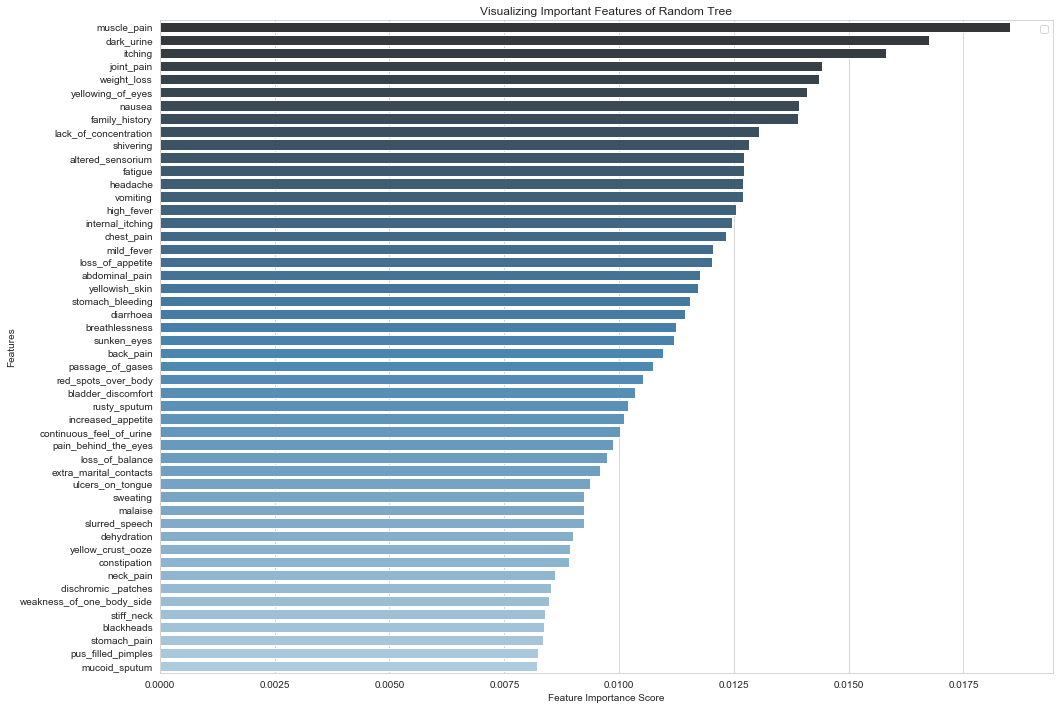

In [23]:
#Visualizing the feature importance on bar graph
fig = plt.gcf()
fig.set_size_inches(16, 12)

# Creating a bar plot
sns.set_style("whitegrid")
sns.barplot(x=feature_imp1, y=feature_imp1.index, palette='Blues_d',color='white')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features of Random Tree")
plt.legend()
plt.show()

In [24]:
# model of the decision tree----------decision tree----------
from sklearn import tree    
clf=tree.DecisionTreeClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [25]:
#Decision tree accuracy
print("Decision tree Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Decision tree Accuracy: 100.0


In [26]:
#feature_imp2=clf.feature_importances_
feature_imp2 = pd.Series(clf.feature_importances_,index=list(DiseasePrediction.columns[:-1])).sort_values(ascending=False).head(50)
feature_imp2[::-1]
#Feature Importance according to decision tree
#yellowing of eyes is most frequent

weakness_of_one_body_side         0.001749
breathlessness                    0.001755
watering_from_eyes                0.001759
stomach_pain                      0.002034
sunken_eyes                       0.002041
scurring                          0.002317
patches_in_throat                 0.002333
painful_walking                   0.004183
fatigue                           0.004191
cough                             0.004588
spotting_ urination               0.017075
sweating                          0.018631
dischromic _patches               0.019487
unsteadiness                      0.019955
family_history                    0.020728
abnormal_menstruation             0.020932
pus_filled_pimples                0.021534
mucoid_sputum                     0.021908
ulcers_on_tongue                  0.022039
neck_pain                         0.022458
receiving_unsterile_injections    0.022710
fluid_overload.1                  0.022873
movement_stiffness                0.022921
rusty_sputu

No handles with labels found to put in legend.


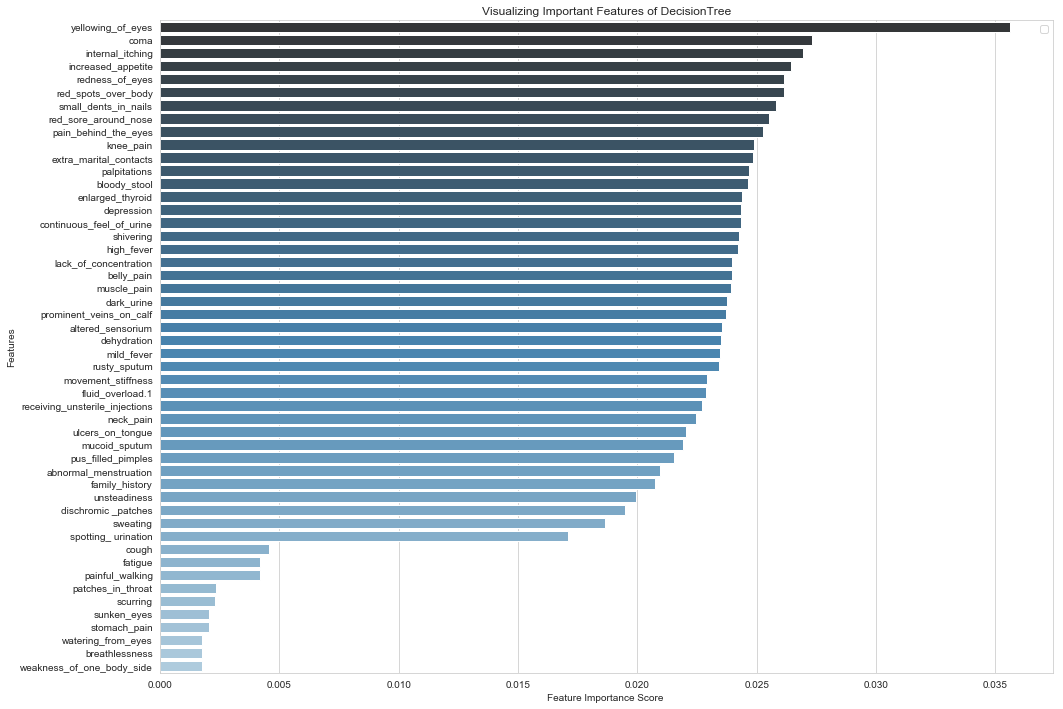

In [27]:
#visualizing the decision tree important features
fig = plt.gcf()
fig.set_size_inches(16, 12)

# Creating a bar plot
sns.set_style("whitegrid")
sns.barplot(x=feature_imp2, y=feature_imp2.index, palette='Blues_d',color='white')

# Add labels to your graph
plt.xlabel('Feature Importance Score ')
plt.ylabel('Features')
plt.title("Visualizing Important Features of DecisionTree")
plt.legend()
plt.show()

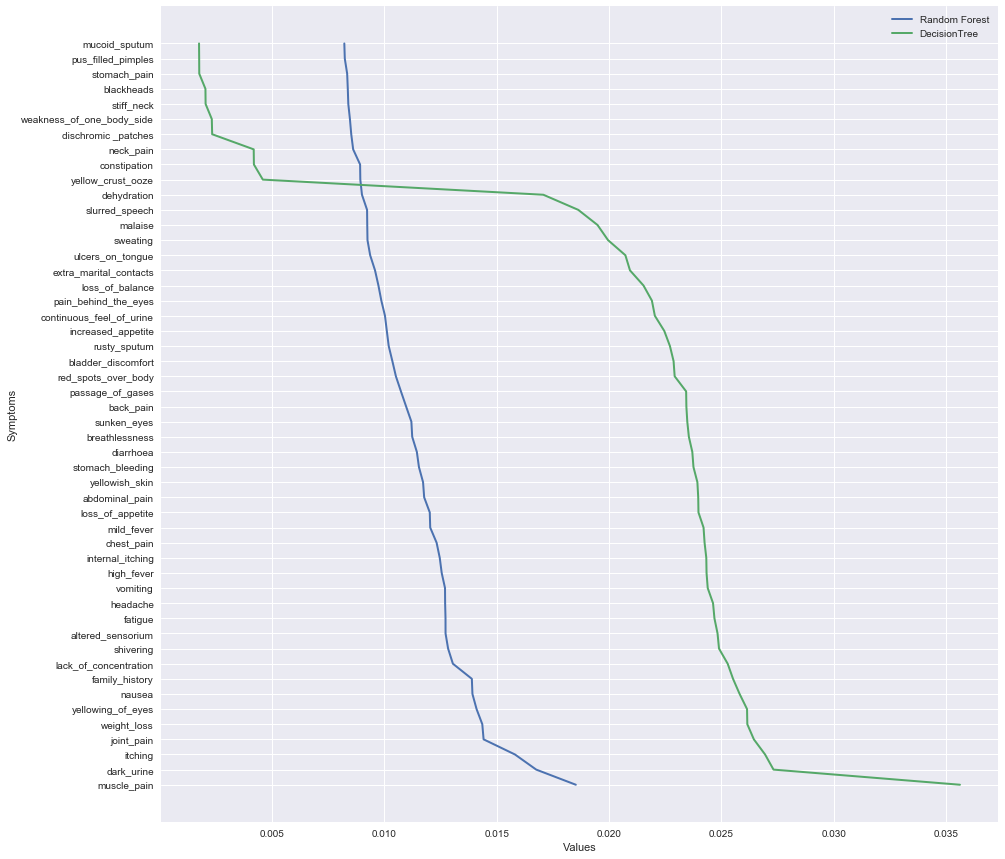

In [28]:
#comparison of both random forest and decision tree
x = feature_imp1 
y = feature_imp1.index

x2 = feature_imp2 
y2= feature_imp1.index
plt.style.use('seaborn')
plt.figure(num=None, figsize=(15,15))

# can plot specifically, after just showing the defaults:
plt.plot(x,y,linewidth=2,label='Random Forest')
plt.plot(x2,y2,linewidth=2,label='DecisionTree')

plt.ylabel('Symptoms')
plt.xlabel('Values')
plt.legend()

plt.show()

In [29]:
#grouping of disease GERD 
f=DiseasePrediction.loc[DiseasePrediction['prognosis'] == 'GERD'] 

In [30]:
f

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
20,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
21,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,GERD
22,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,GERD
23,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
24,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
25,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
26,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,GERD
27,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,GERD
28,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,GERD
29,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD


In [36]:
f.shape

(120, 133)

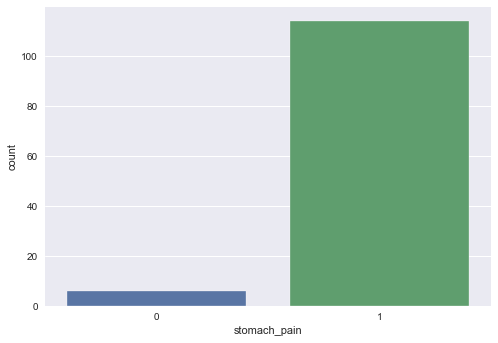

In [49]:
#GERD disease symptoms stomachpain,acidity,ulcers on tounge using countplot
sns.countplot(f['stomach_pain'])

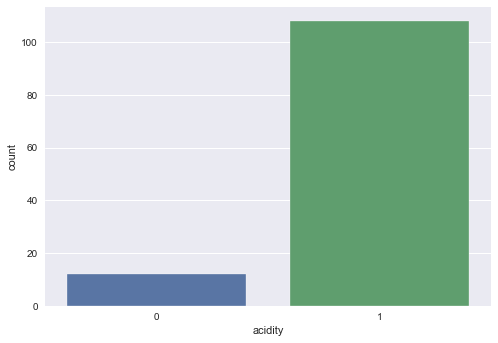

In [47]:
sns.countplot(f['acidity'])

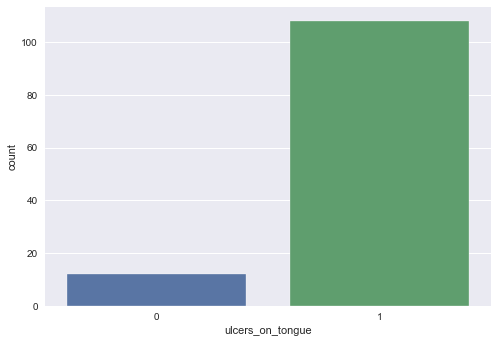

In [48]:
sns.countplot(f['ulcers_on_tongue'])